# Compute expressions on vector data (polygons)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import geoengine as ge

In [2]:
ge.initialize("http://localhost:3030/api")

Retrieve source data, which are country polygons

,geometry,start,end
0,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48...",NaT,NaT


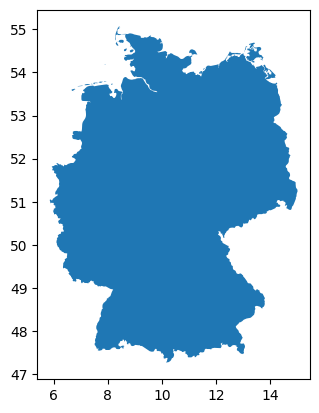

In [ ]:
query_rectangle = ge.QueryRectangle(
    ge.BoundingBox2D(-111.533203125, -4.482421875, 114.345703125, 73.388671875),
    ge.TimeInterval(np.datetime64('2014-04-01'))
)

source_workflow = ge.register_workflow(ge.workflow_builder.operators.OgrSource("germany_outline"))

source_data = source_workflow.get_dataframe(query_rectangle)

source_data.plot()

source_data

Compute the area as a new column

,geometry,area,start,end
0,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48...",45.930027,NaT,NaT


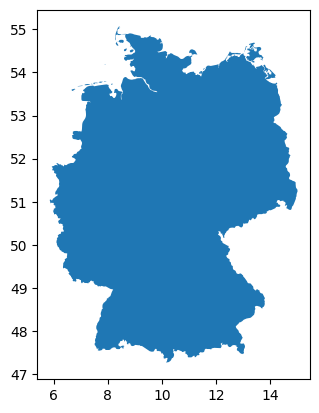

In [4]:
area_workflow = ge.register_workflow(
    ge.workflow_builder.operators.VectorExpression(
        source_workflow.workflow_definition().operator,
        expression="area(geom)",
        input_columns=[],
        output_column="area",
    )
)

area_data = area_workflow.get_dataframe(query_rectangle)

area_data.plot()

area_data

Compute a new column based on the previously created one

,geometry,area2x,area,start,end
0,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48...",91.860055,45.930027,NaT,NaT


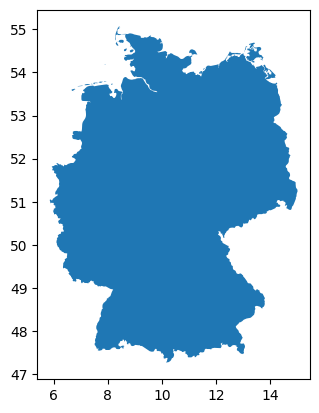

In [5]:
area_2x_workflow = ge.register_workflow(
    ge.workflow_builder.operators.VectorExpression(
        area_workflow.workflow_definition().operator,
        expression="2 * area",
        input_columns=["area"],
        output_column="area2x",
    )
)

area_2x_data = area_2x_workflow.get_dataframe(query_rectangle)

area_2x_data.plot()

area_2x_data

Compute the centroid of each polygon and plot it along the original polygons

,geometry,start,end
0,POINT (10.38149 51.10636),NaT,NaT


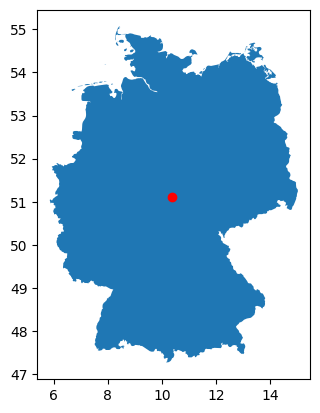

In [6]:
centroid_workflow = ge.register_workflow(
    ge.workflow_builder.operators.VectorExpression(
        source_workflow.workflow_definition().operator,
        expression="centroid(geom)",
        input_columns=[],
        output_column=ge.workflow_builder.operators.GeoVectorDataType.MULTI_POINT,
    )
)

centroid_data = centroid_workflow.get_dataframe(query_rectangle)

source_data.plot()
centroid_data.plot(ax=plt.gca(), color="red")

centroid_data